In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

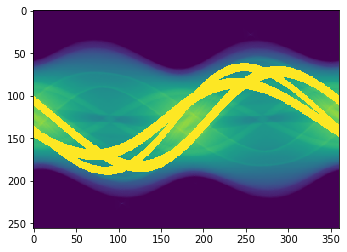

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size-1):
    for j in range(100-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 30 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
k = 0

for i in range(256-window_size):
    for j in range(100-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                for v in range(window_size):
                    for w in range(window_size):
                        train_data[k,w,v,0] = result_img[i+w,j+v]
                result_data[k,0] = int(result_img[i+window_size-1,j])
                k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(20052, 3, 3, 1)
(20052, 1)
Epoch 1/1000
627/627 [==============================] - 1s 1ms/step - loss: 3.4932 - accuracy: 0.3753
Epoch 2/1000
627/627 [==============================] - 1s 1ms/step - loss: 3.0652 - accuracy: 0.4055
Epoch 3/1000
627/627 [==============================] - 1s 1ms/step - loss: 3.0051 - accuracy: 0.4080
Epoch 4/1000
627/627 [==============================] - 1s 1ms/step - loss: 2.9237 - accuracy: 0.4103
Epoch 5/1000
627/627 [==============================] - 1s 1ms/step - loss: 2.8047 - accuracy: 0.4150
Epoch 6/1000
627/627 [==============================] - 1s 1ms/step - loss: 2.5520 - accuracy: 0.4214
Epoch 7/1000
627/627 [==============================] - 1s 1ms/step - loss: 2.3448 - accuracy: 0.4284
Epoch 8/1000
627/627 [==============================] - 1s 1ms/step - loss: 2.2387 - accuracy: 0.4351
Epoch 9/1000
627/627 [==============================] - 1s 1ms/step - loss: 2.1670 - accuracy: 0.4425
Epoch 10/1000
627/627 [==============================]

627/627 [==============================] - 1s 1ms/step - loss: 1.4331 - accuracy: 0.5236
Epoch 81/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.4185 - accuracy: 0.5249
Epoch 82/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.4023 - accuracy: 0.5295
Epoch 83/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.4067 - accuracy: 0.5265
Epoch 84/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.4139 - accuracy: 0.5272
Epoch 85/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.3935 - accuracy: 0.5319
Epoch 86/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.3827 - accuracy: 0.5374
Epoch 87/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.3996 - accuracy: 0.5273
Epoch 88/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.3796 - accuracy: 0.5364
Epoch 89/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.4047 - a

627/627 [==============================] - 1s 1ms/step - loss: 1.1820 - accuracy: 0.5795
Epoch 160/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.1692 - accuracy: 0.5815
Epoch 161/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.1811 - accuracy: 0.5792
Epoch 162/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.2022 - accuracy: 0.5715
Epoch 163/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.1696 - accuracy: 0.5804
Epoch 164/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.1844 - accuracy: 0.5739
Epoch 165/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.1632 - accuracy: 0.5822
Epoch 166/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.1560 - accuracy: 0.5840
Epoch 167/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.1803 - accuracy: 0.5813
Epoch 168/1000
627/627 [==============================] - 1s 1ms/step - loss: 1

627/627 [==============================] - 1s 1ms/step - loss: 1.0711 - accuracy: 0.6093
Epoch 238/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0872 - accuracy: 0.5987
Epoch 239/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0464 - accuracy: 0.6168
Epoch 240/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0780 - accuracy: 0.6021
Epoch 241/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0598 - accuracy: 0.6082
Epoch 242/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0592 - accuracy: 0.6092
Epoch 243/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0679 - accuracy: 0.6056
Epoch 244/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0767 - accuracy: 0.6060
Epoch 245/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0586 - accuracy: 0.6071
Epoch 246/1000
627/627 [==============================] - 1s 1ms/step - loss: 1

627/627 [==============================] - 1s 1ms/step - loss: 1.0205 - accuracy: 0.6206
Epoch 316/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0016 - accuracy: 0.6251
Epoch 317/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.9925 - accuracy: 0.6259
Epoch 318/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0091 - accuracy: 0.6259
Epoch 319/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9824 - accuracy: 0.6294
Epoch 320/1000
627/627 [==============================] - 1s 1ms/step - loss: 1.0375 - accuracy: 0.6159
Epoch 321/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9970 - accuracy: 0.6273
Epoch 322/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9979 - accuracy: 0.6290
Epoch 323/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9637 - accuracy: 0.6391
Epoch 324/1000
627/627 [==============================] - 1s 1ms/step - loss: 1

627/627 [==============================] - 1s 1ms/step - loss: 0.9278 - accuracy: 0.6455
Epoch 394/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9992 - accuracy: 0.6270
Epoch 395/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9077 - accuracy: 0.6575
Epoch 396/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9225 - accuracy: 0.6501
Epoch 397/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9589 - accuracy: 0.6416
Epoch 398/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9288 - accuracy: 0.6436
Epoch 399/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9355 - accuracy: 0.6448
Epoch 400/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9286 - accuracy: 0.6477
Epoch 401/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9562 - accuracy: 0.6410
Epoch 402/1000
627/627 [==============================] - 1s 1ms/step - loss: 0

627/627 [==============================] - 1s 1ms/step - loss: 0.8768 - accuracy: 0.6622
Epoch 472/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8922 - accuracy: 0.6592
Epoch 473/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8932 - accuracy: 0.6590
Epoch 474/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8941 - accuracy: 0.6527
Epoch 475/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8651 - accuracy: 0.6649
Epoch 476/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9212 - accuracy: 0.6438
Epoch 477/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9254 - accuracy: 0.6549
Epoch 478/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8962 - accuracy: 0.6566
Epoch 479/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9193 - accuracy: 0.6532
Epoch 480/1000
627/627 [==============================] - 1s 1ms/step - loss: 0

627/627 [==============================] - 1s 1ms/step - loss: 0.8418 - accuracy: 0.6688
Epoch 550/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.9434 - accuracy: 0.6598
Epoch 551/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8439 - accuracy: 0.6742
Epoch 552/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.8187 - accuracy: 0.6846
Epoch 553/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.8980 - accuracy: 0.6586
Epoch 554/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.9085 - accuracy: 0.6593
Epoch 555/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.8182 - accuracy: 0.6829
Epoch 556/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.8293 - accuracy: 0.6790
Epoch 557/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8478 - accuracy: 0.6724
Epoch 558/1000
627/627 [==============================] - 1s 2ms/step - loss: 0

627/627 [==============================] - 1s 1ms/step - loss: 0.8575 - accuracy: 0.6766
Epoch 628/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8335 - accuracy: 0.6770
Epoch 629/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8461 - accuracy: 0.6693
Epoch 630/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8038 - accuracy: 0.6895
Epoch 631/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8336 - accuracy: 0.6830
Epoch 632/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8341 - accuracy: 0.6801
Epoch 633/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8062 - accuracy: 0.6868
Epoch 634/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8382 - accuracy: 0.6822
Epoch 635/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8433 - accuracy: 0.6777
Epoch 636/1000
627/627 [==============================] - 1s 1ms/step - loss: 0

627/627 [==============================] - 1s 1ms/step - loss: 0.7684 - accuracy: 0.6971
Epoch 706/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8172 - accuracy: 0.6840
Epoch 707/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.7684 - accuracy: 0.6960
Epoch 708/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8202 - accuracy: 0.6859
Epoch 709/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.7640 - accuracy: 0.7009
Epoch 710/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8208 - accuracy: 0.6801
Epoch 711/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8130 - accuracy: 0.6809
Epoch 712/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.7583 - accuracy: 0.7028
Epoch 713/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.7882 - accuracy: 0.6930
Epoch 714/1000
627/627 [==============================] - 1s 1ms/step - loss: 0

627/627 [==============================] - 1s 1ms/step - loss: 0.7860 - accuracy: 0.6905
Epoch 784/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7519 - accuracy: 0.7059
Epoch 785/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7915 - accuracy: 0.6958
Epoch 786/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.7597 - accuracy: 0.7011
Epoch 787/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7827 - accuracy: 0.6968
Epoch 788/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.7449 - accuracy: 0.7067
Epoch 789/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.8041 - accuracy: 0.6905
Epoch 790/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.7556 - accuracy: 0.7025
Epoch 791/1000
627/627 [==============================] - 1s 1ms/step - loss: 0.7312 - accuracy: 0.7117
Epoch 792/1000
627/627 [==============================] - 1s 1ms/step - loss: 0

627/627 [==============================] - 1s 2ms/step - loss: 0.7298 - accuracy: 0.7149
Epoch 862/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7335 - accuracy: 0.7115
Epoch 863/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7704 - accuracy: 0.7020
Epoch 864/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7347 - accuracy: 0.7123
Epoch 865/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7568 - accuracy: 0.7040
Epoch 866/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7291 - accuracy: 0.7170
Epoch 867/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7653 - accuracy: 0.7074
Epoch 868/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7124 - accuracy: 0.7190
Epoch 869/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7725 - accuracy: 0.7088
Epoch 870/1000
627/627 [==============================] - 1s 2ms/step - loss: 0

627/627 [==============================] - 1s 2ms/step - loss: 0.6821 - accuracy: 0.7355
Epoch 940/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7472 - accuracy: 0.7116
Epoch 941/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7318 - accuracy: 0.7121
Epoch 942/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7438 - accuracy: 0.7113
Epoch 943/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7712 - accuracy: 0.7047
Epoch 944/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7031 - accuracy: 0.7224
Epoch 945/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.7282
Epoch 946/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7796 - accuracy: 0.7007
Epoch 947/1000
627/627 [==============================] - 1s 2ms/step - loss: 0.7021 - accuracy: 0.7217
Epoch 948/1000
627/627 [==============================] - 1s 2ms/step - loss: 0

In [9]:
for i in range(256-window_size):
    for j in range(100-window_size):
        if result_img[i+window_size-1,j] == 300:
            test_data = np.zeros((1,window_size,window_size,1))
            for v in range(window_size):
                for w in range(window_size):
                    test_data[0,w,v,0] = result_img[i+w,j+v]
            prediction = model.predict(test_data)
            result_img[i+window_size-1,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
            print(np.where(prediction[0]==max(prediction[0]))[0][0])

248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248


248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
250
250
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
250
250
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
250
250
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
250
250
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
248
250
250
248
248
248
248
248
248
248
248
248
248
248
248
248


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

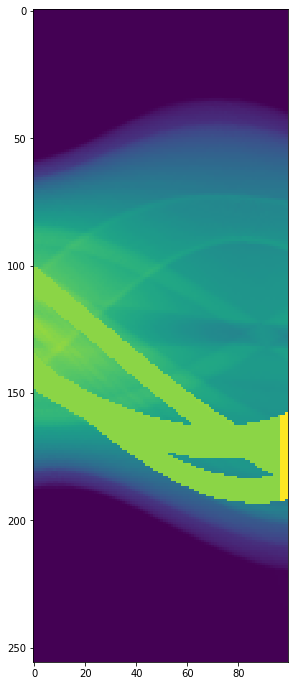

In [10]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:100])
plt.colorbar

In [11]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [12]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)